<div style="background-image: url(https://raw.githubusercontent.com/PGM-Lab/pythoncourse-I/master/assets/header.png); background-size: cover; height: 100px">
<div style="padding: 10px; padding-left:20px">    
    
<h1><font color="#585858" size=4>Módulo 5: Pandas</font><br>
    <font color="#585858" size=5>Python - Tutorial I</font></h1>
</div>
</div>


<br>
<div style="text-align: left">
<font color="#585858" size=3>Andrés Masegosa</font><br>
<font color="#585858" size=3>Curso de Python I</font><br>
<font color="#585858" size=3>Universidad de Almería</font>

</div>

<a href="https://colab.research.google.com/github/PGM-Lab/pythoncourse-I/blob/master/sesion5/pythoncourses-sesion5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `pandas`


El objetivo de esta sesión &mdash; a través este cuaderno de Jupyter&mdash; es proporcionar a los asistentes un conocimiento básico de `pandas`. Se asume que se han seguido las sesiones anteriores del curso y que, por tanto, estás familiarizado con la sintáxis básica de Python.

`pandas` está diseñado para facilitar el trabajo con datos estructurados. La mayoría de los análisis que puede realizar probablemente impliquen el uso de datos tabulados, por ejemplo, de archivos .csv o bases de datos relacionales como SQL. Para ello partiremos de un objeto `DataFrame`. Un objeto `DataFrame` en `pandas` es "una estructura de datos tabular, bidimensional y orientada a columnas, que además cuenta con etiquetas para indexar filas y columnas".

Si tienes curiosidad:
>El nombre de los `pandas` se deriva de  *datos de panel* (*panel data* en inglés), un término de econometría para conjuntos de datos estructurados multidimensionales. 


Para motivar esta sesión, trabajaremos con un conjunto de datos concreto, y mostraremos una serie de operaciones para preparar los datos para su posterior análisis. Con suerte, te darás cuenta de que hacer este tipo de trabajo es mucho más difícil si solo usáramos las estructuras de datos básicas de Python.


Para cualquier duda, consulta la [documentación completa de `pandas`](http://pandas.pydata.org/pandas-docs/stable/).

### Table of Contents

1 - [The DataFrame](#section1)<br>

2 - [Rename, Index, and Slice](#section2)<br>

3 - [Manipulating Columns](#section3)<br>

4 - [Merging](#section4)<br>

5 - [Calculating Unique And Missing Values](#section5)<br>

6 - [Groupby](#section6)<br>

7- [Exporting To CSV](#section7)<br>

8 - [Handling Missing Values (Boolean Indexing)](#section8)<br>

9 - [Sorting Values](#section9)<br>

10 - [Plotting In Pandas](#section10)<br>

## 1. DataFrame: Importando Datos y Resumenes Estadísticos <a id="section1"/>


Los datos utilizados en estos ejemplos están disponibles en el [repositorio de GitHub](https://github.com/PGM-Lab/pythoncourse-I) de esto curso. 

Para este ejemplo, estamos trabajando con datos de desempleo europeos de Eurostat, alojados por Google. Hay varios archivos .csv con los que trabajaremos en esta sesión.

Comencemos importando `pandas` usando la abreviatura convencional.



In [1]:
!pip install pandas

!pip install matplotlib

%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('savefig', dpi=200)
plt.style.use('ggplot')
plt.rcParams['xtick.minor.size'] = 0
plt.rcParams['ytick.minor.size'] = 0

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


La función `read_csv()` en `pandas` nos permite importar fácilmente nuestros datos. Por defecto, asume que los datos están delimitados por comas. Sin embargo, puede especificar el delimitador utilizado en sus datos (por ejemplo, tabulación, punto y coma, etc.). Hay varios parámetros que puede especificar. Vea la documentación [aquí](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). `read_csv()` devuelve un `DataFrame`.
Observe que llamamos a `read_csv()` usando la abreviatura de `pd` definida en el `import` anterior.

In [2]:
unemployment = pd.read_csv('https://raw.githubusercontent.com/PGM-Lab/pythoncourse-I/master/sesion5/data/country_total.csv')


¡Genial! Acabas de crear un `DataFrame` de `pandas`. Ahora podemos ver nuestros datos utilizando el método `.head()`. Por defecto, esto muestra el encabezado (nombres de columna) y las primeras cinco filas. Al pasar un entero, $n$, al método `.head()` devuelve ese número de filas. Para ver las últimas filas, use `.tail()`.

In [3]:
unemployment.head()

,country,seasonality,month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9


Para saber el número de filas, puede usar la función `len()`. Aunque también puede utilizar el atributo `shape`.

In [4]:
unemployment.shape

(20796, 5)

Hay 20.796 filas y 5 columnas.

Un método útil que genera varios resúmenes estadísticos es `.describe()`.

In [5]:
unemployment.describe()

,month,unemployment,unemployment_rate
count,20796.000000,2.079600e+04,19851.000000
mean,1999.401290,7.900818e+05,8.179764
std,7.483751,1.015280e+06,3.922533
min,1983.010000,2.000000e+03,1.100000
25%,1994.090000,1.400000e+05,5.200000
50%,2001.010000,3.100000e+05,7.600000
75%,2006.010000,1.262250e+06,10.000000
max,2010.120000,4.773000e+06,20.900000


Es posible que hayas visto que `count` es más bajo para la tasa de desempleo. Esto se debe a que el resumen estadístico se basa en valores **no perdidos** y el conteo refleja eso.

Cuando el `DataFrame` incluye tipos de datos numéricos y de objeto (por ejemplo, cadenas), por defecto resumirá los datos numéricos. Si se llama a ``.describe(include='all')``  devolverá el conteo, el número de valores únicos y el valor más frecuente junto con su conteo.

In [6]:
unemployment.dtypes

country               object
seasonality           object
month                float64
unemployment           int64
unemployment_rate    float64
dtype: object

In [7]:
unemployment.describe(include='all')

,country,seasonality,month,unemployment,unemployment_rate
count,20796,20796,20796.000000,2.079600e+04,19851.000000
unique,30,3,NaN,NaN,NaN
top,ie,sa,NaN,NaN,NaN
freq,1008,7020,NaN,NaN,NaN
mean,NaN,NaN,1999.401290,7.900818e+05,8.179764
std,NaN,NaN,7.483751,1.015280e+06,3.922533
min,NaN,NaN,1983.010000,2.000000e+03,1.100000
25%,NaN,NaN,1994.090000,1.400000e+05,5.200000
50%,NaN,NaN,2001.010000,3.100000e+05,7.600000
75%,NaN,NaN,2006.010000,1.262250e+06,10.000000



### Problema 1: Importar Datos de una URL

Anteriormente, importamos los datos de desempleo mediante la función `read_csv` proporcionando una ruta de archivo relativa. Pero `read_csv` es [un método muy flexible](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html); también nos permite importar datos utilizando una dirección URL como ruta del archivo.

Un archivo csv con datos sobre los países del mundo y sus abreviaturas se encuentra en [https://raw.githubusercontent.com/PGM-Lab/pythoncourse-I/master/sesion5/data/countries.csv](https://raw.githubusercontent.com/PGM-Lab/pythoncourse-I/master/sesion5/data/countries.csv) (guardado en el cuadro siguiente como una variable de cadena llamada `paises_url`).

Introduce el código necesario para importar estos datos.

### Problema 2: El método `tail` 

Los `DataFrames` tienen un método llamado `tail` que toma un entero como argumento y devuelve un nuevo `DataFrame`. Antes de usar `tail`, ¿sabrías adivinar qué es lo que hace?

In [9]:
# Usa el método tail bien en el conjunto de datos de desempleo o en el de paises.


### Problema 3: Describir el conjunto de datos `countries`

Siempre es importante comprender algunos aspectos básicos sobre nuestors datos antes de comenzar a trabajar con ellos, incluida la información que contiene, su tamaño y la forma en que generalmente se distribuyen los valores.

Usando los métodos y atributos anteriores, responda las siguientes preguntas sobre `countries`:
* ¿Qué columnas contiene?
* ¿Qué significa cada fila?
* ¿Cuántas filas y columnas contiene?
* ¿hay valores *perdidos* en las columnas de latitud o longitud?

Sugerencia: las funciones `head` y `describe`, así como el atributo `shape`, serán de utilidad aquí.

## 2. Renombrar, indexar y dividir <a id="section2"/>
Volvemos a el conjunto de datos de desempleo. Puede que hayas notado que la columna `month` también incluye el año. Sigamos adelante y renómbremosla.

In [10]:
unemployment.head()

,country,seasonality,month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9


In [11]:
unemployment.rename(columns={'month' : 'year_month'}, inplace=True)

El método `.rename ()` permite modificar etiquetas de índice y/o nombres de columnas. Como se puede ver, pasamos un `dict` al parámetro` columns`, con el nombre original como clave y el nuevo nombre como valor. Es importante destacar que también establecemos el parámetro `inplace` en` True`, que modifica el `DataFrame` *real*, no una copia del mismo.

También podría tener sentido separar los datos en `year_month` en dos columnas separadas. Para ello, debemos saber primero cómo seleccionar una sola columna. Podemos usar el corchete (`[]`) o la notación de puntos (denominado *atributo de acceso*).


In [12]:
unemployment['year_month'].head()

0    1993.01
1    1993.02
2    1993.03
3    1993.04
4    1993.05
Name: year_month, dtype: float64

In [13]:
unemployment.year_month.head()

0    1993.01
1    1993.02
2    1993.03
3    1993.04
4    1993.05
Name: year_month, dtype: float64

In [14]:
unemployment.head()

,country,seasonality,year_month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9


Es preferible utilizar la notación de corchete ya que un nombre de columna podría tener inadvertidamente el mismo nombre que un método de `DataFrame`. Además, solo se puede usar la notación de corchetes para crear una nueva columna. Si intenta y usa el *acceso por atributo* para crear una nueva columna, creará un nuevo atributo, *no* una nueva columna.



Un `DataFrame` también tiene un índice. En nuestro ejemplo, los índices son una matriz de enteros secuenciales, que es el valor predeterminado. Puede encontrarlos en la posición más a la izquierda, sin una etiqueta de columna.

Los índices no tienen por qué ser una secuencia de enteros. Pueden, por ejemplo, ser fechas o cadenas. Tenga en cuenta que los índices *no* deben ser únicos.

Los índices, como los nombres de las columnas, pueden usarse para seleccionar datos. Los índices se pueden utilizar para seleccionar filas particulares. De hecho, puede hacer algo como `.head ()` con el uso del operador `[]`.

In [15]:
unemployment[:5]

,country,seasonality,year_month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9


Antes de continuar, veamos algunas formas útiles de indexar datos, es decir, seleccionar filas.

`.loc` trabaja principalmente con etiquetas de cadena. Acepta una sola etiqueta, una lista (o matriz) de etiquetas o una porción de etiquetas (por ejemplo, `'a': 'f'`).

Vamos a crear un `DataFrame` para ver cómo funciona esto. (Para ello nos basamos en un [ejemplo](https://github.com/fonnesbeck/scipy2015_tutorial/blob/master/notebooks/1.%20Data%20Preparation.ipynb) de [Fonational Statistics II Tutorial de Chris Fonnesbeck](https://github.com/fonnesbeck/scipy2015_tutorial).


In [16]:
bacteria = pd.DataFrame({'bacteria_counts' : [632, 1638, 569, 115],
                         'other_feature' : [438, 833, 234, 298]},
                         index=['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])

Observe que pasamos en un `dict`, donde las claves corresponden a los nombres de las columnas y los valores a los datos. En este ejemplo, también hemos establecido los índices &mdash; cadenas en este caso &mdash; para que sean el nombre de cada bacteria.

In [17]:
bacteria

,bacteria_counts,other_feature
Firmicutes,632,438
Proteobacteria,1638,833
Actinobacteria,569,234
Bacteroidetes,115,298


Ahora, si estamos interesados en los valores (filas) asociados con "Actinobacteria", podemos usar `.loc` y el nombre del índice.

In [18]:
bacteria.loc['Actinobacteria']

bacteria_counts    569
other_feature      234
Name: Actinobacteria, dtype: int64

Esto devuelve los valores de las columnas para la fila especificada. Curiosamente, también podríamos haber utilizado la "indexación posicional", aunque los índices son cadenas.

In [19]:
bacteria[2:3]

,bacteria_counts,other_feature
Actinobacteria,569,234


La diferencia es que el primero devuelve una `Serie` porque seleccionamos una sola etiqueta, mientras que el último devuelve un `DataFrame` porque seleccionamos un rango de posiciones.

Volvamos a nuestros datos de desempleo. Otra opción de indexación, `.iloc`, funciona principalmente con posiciones enteras. Para seleccionar filas específicas, podemos hacer lo siguiente.

In [20]:
unemployment.iloc[[1, 5, 6, 9]]

,country,seasonality,year_month,unemployment,unemployment_rate
1,at,nsa,1993.02,175000,4.6
5,at,nsa,1993.06,134000,3.5
6,at,nsa,1993.07,128000,3.4
9,at,nsa,1993.10,141000,3.7


Podemos seleccionar un rango de filas y especificar el valor de cada salto.

In [21]:
unemployment.iloc[25:50:5]

,country,seasonality,year_month,unemployment,unemployment_rate
25,at,nsa,1995.02,174000,4.5
30,at,nsa,1995.07,123000,3.3
35,at,nsa,1995.12,175000,4.7
40,at,nsa,1996.05,159000,4.3
45,at,nsa,1996.10,146000,3.9


(Nota: Como es típico en Python, la posición final no está incluida. Por lo tanto, no vemos la fila asociada con el índice 50).

La indexación es importante. Lo usarás mucho. A continuación, te mostraremos cómo indexar en función de los valores de los datos.

### Problema 4: Renombrando columnas en  `bacteria`

La columna "other_feature" en nuestra tabla `bacteria` no es muy descriptiva. Supongamos que sabemos que "other_feature" se refiere a un segundo conjunto de observaciones de recuento de bacterias. Utilice el método `rename` para dar a "other_feature" un nombre más descriptivo, tal como "second_count".

In [22]:
# renombra "other_feature" en la tabla bacteria


### Problema 5: Indexación para obtener un valor específico

Tanto `loc` como` iloc` pueden usarse para seleccionar un valor particular si se les dan dos argumentos. El primer argumento es el nombre (cuando se usa `loc`) o el número de índice (cuando se usa` iloc`) de la *fila* que se desea obtener, mientras que el segundo argumento es el nombre o número de índice de la *columna* buscada.

Usando `loc`, selecciona "Bacteroidetes" y "bacteria_counts" para obtener el recuento de Bacteroidetes.

BONUS: ¿cómo podrías hacer la misma tarea usando `iloc`?

### Problema 6: Indexación de múltiples filas y columnas

Tanto `loc` como` iloc` pueden usarse para seleccionar subconjuntos de columnas *y* filas al mismo tiempo si se les dan listas (y/o puntos de corte, para `iloc`) en sus dos argumentos.

Usando `iloc` en el DataFrame `unemployment`, obtén:
* Las filas que comienza en la fila 4 y termina en la fila 7
* Las columnas primera, segunda y tercera

BONUS: ¿cómo podrías hacer la misma tarea usando `loc`?

## 3. Manipulación de columnas: cambio de nombre, creación, reordenación <a id="section3"/>

Ahora vamos a **dividir la columna `year_month` en dos columnas separadas.** Arriba, vimos que esta columna es de tipo (técnicamente, `dtype`) `float64`. 

In [23]:
unemployment.dtypes

country               object
seasonality           object
year_month           float64
unemployment           int64
unemployment_rate    float64
dtype: object

Primero extraeremos el año usando el método `.astype ()`. Esto permite la conversión de tipos, básicamente la conversión de un tipo a otro. Luego restaremos este valor de `year_month` a la parte decimal del valor &mdash; y multiplicaremos el resultado por 100 y convertiremos a `int`.

Para más información sobre los `dtype` de `pandas`, pues ir a la [documentación](http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes).

In [24]:
unemployment['year'] = unemployment['year_month'].astype(int)
unemployment.head()

,country,seasonality,year_month,unemployment,unemployment_rate,year
0,at,nsa,1993.01,171000,4.5,1993
1,at,nsa,1993.02,175000,4.6,1993
2,at,nsa,1993.03,166000,4.4,1993
3,at,nsa,1993.04,157000,4.1,1993
4,at,nsa,1993.05,147000,3.9,1993


En este caso, estamos convirtiendo los valores de punto flotante en enteros. En Python, esto [trunca los decimales](https://docs.python.org/2/library/stdtypes.html#numeric-types-int-float-long-complex).

Finalmente, creamos nuestra variable **month** como se describe anteriormente. (Debido al truncamiento que se produce cuando se convierte a `int`, primero redondeamos los valores al número entero más cercano).

In [25]:
unemployment['month'] = ((unemployment['year_month'] - unemployment['year']) * 100).round(0).astype(int)
unemployment.head()

,country,seasonality,year_month,unemployment,unemployment_rate,year,month
0,at,nsa,1993.01,171000,4.5,1993,1
1,at,nsa,1993.02,175000,4.6,1993,2
2,at,nsa,1993.03,166000,4.4,1993,3
3,at,nsa,1993.04,157000,4.1,1993,4
4,at,nsa,1993.05,147000,3.9,1993,5


Para crear la columna `month`, restamos dos vectores. Esto da como resultado el valor decimal en `year_month`. Para transformar los valores a enteros, multiplicamos por 100.

Ahora, digamos que queremos **reordenar las columnas** en el `DataFrame`. Para esto, usamos la notación de corchetes nuevamente, haciendo coincidir en una lista de nombres de columna en el orden en que nos gustaría verlos.

In [26]:
unemployment = unemployment[['country', 'seasonality',
                             'year_month', 'year', 'month',
                             'unemployment', 'unemployment_rate']]
unemployment.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate
0,at,nsa,1993.01,1993,1,171000,4.5
1,at,nsa,1993.02,1993,2,175000,4.6
2,at,nsa,1993.03,1993,3,166000,4.4
3,at,nsa,1993.04,1993,4,157000,4.1
4,at,nsa,1993.05,1993,5,147000,3.9


## 4. Fusión <a id="section4"/>

Hasta ahora, nuestro `DataFrame` está organizado de una manera razonable. Pero, sabemos que podemos hacerlo mejor. Eventualmente nos interesará la tasa de desempleo de cada país. El problema es que no sabemos exactamente a qué se refieren los valores en `country`. Podemos arreglar eso obteniendo nombres de países. Estos se pueden encontrar en `countries.csv`. Ejecute la siguiente celda para importar los datos de los países utilizando una URL como ruta del archivo.

In [27]:
unemployment.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate
0,at,nsa,1993.01,1993,1,171000,4.5
1,at,nsa,1993.02,1993,2,175000,4.6
2,at,nsa,1993.03,1993,3,166000,4.4
3,at,nsa,1993.04,1993,4,157000,4.1
4,at,nsa,1993.05,1993,5,147000,3.9


In [28]:
countries_url = 'https://raw.githubusercontent.com/PGM-Lab/pythoncourse-I/master/sesion5/data/countries.csv'
countries = pd.read_csv(countries_url)

In [29]:
countries.tail(3)

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
27,se,SE,eu,Sweden,Suède,Schweden,62.198468,14.896307
28,tr,TR,non-eu,Turkey,Turquie,Türkei,38.952942,35.439795
29,uk,GB,eu,United Kingdom,Royaume-Uni,Vereinigtes Königreich,54.315447,-2.232612


Este archivo tiene mucha información útil. Incluso tiene los nombres de los países en tres idiomas diferentes.

Debido a que los datos que necesitamos se almacenan en dos archivos separados, queremos combinar los datos de alguna manera. Determinemos qué columna podemos usar para unir estos datos. `country` parece una buena opción. Sin embargo, no necesitamos todas las columnas en el `DataFrame`. Para seleccionar ciertas columnas, usamos la notación de corchetes de nombre que usamos para reordenar las columnas.

In [30]:
country_names = countries[['country', 'country_group', 'name_en']]

In [31]:
country_names.head(2)

,country,country_group,name_en
0,at,eu,Austria
1,be,eu,Belgium


`pandas` incluye una función de fusión muy fácil de usar. Vamos a usarlo para **fusionar los dos `DataFrame` por el código del país.**

In [32]:
unemployment = pd.merge(unemployment, country_names, on='country')

La fusión es a menudo más compleja que este ejemplo. Si se desea la fusión por varias columnas, puede pasarse una lista de nombres de columnas al parámetro `on`.

```
pd.merge(firstDataFrame, secondDataFrame, on=["name", "id"])
```

Para obtener más información sobre la fusión, consulte la [documentación](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-datafame-joining-merging).

Para obtener más información sobre el método `.merge()`, consulta [aquí](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html).

### Problema 8:

Es posible que deba fusionar dos tablas con columnas con nombres diferentes. Para hacerlo, use los parámetros `left_on` y `right_on`, donde el primer `dataFrame` que aparece en la lista es el 'izquierdo' y el segundo es el 'derecho'. Podría ser algo como esto.

```
pd.merge (one, two, left_on = 'city', right_on = 'city_name')
```

Escriba el código para combinar `unemployment` con un nuevo `DataFrame` llamado` country_codes`, donde la abreviatura de cada país se encuentra en la columna "c_code", que se genera con el siguiente código

In [33]:
country_codes = country_names.rename(columns={"country":"c_code"}).drop(columns="country_group")
country_codes.head()

,c_code,name_en
0,at,Austria
1,be,Belgium
2,bg,Bulgaria
3,hr,Croatia
4,cy,Cyprus


Utilice `merge` para fusionar `unemployment` y `country_codes` por sus códigos de país. Tenga en cuenta que `left_on=` y ` right_on=` estén incluidos en  la llamada a `merge`.

## 5. Cálculo de valores únicos y perdidos <a id="section5"/>

In [34]:
unemployment.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en
0,at,nsa,1993.01,1993,1,171000,4.5,eu,Austria
1,at,nsa,1993.02,1993,2,175000,4.6,eu,Austria
2,at,nsa,1993.03,1993,3,166000,4.4,eu,Austria
3,at,nsa,1993.04,1993,4,157000,4.1,eu,Austria
4,at,nsa,1993.05,1993,5,147000,3.9,eu,Austria


Eso está mucho mejor. Ahora sabemos que la abreviatura "at" corresponde a "Austria". Podríamos tener la curiosidad de verificar en qué países tenemos datos. El objeto asociado a una columna incluye un método `.unique () `. Lo usaremos  para ver de cuantos países tenemos datos. Podemos seleccionar el nombre usando el corchete o la notación de puntos. 

In [35]:
unemployment['name_en'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czech Republic',
       'Germany (including  former GDR from 1991)', 'Denmark', 'Estonia',
       'Spain', 'Finland', 'France', 'Greece', 'Croatia', 'Hungary',
       'Ireland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Sweden',
       'Slovenia', 'Slovakia', 'Turkey', 'United Kingdom'], dtype=object)

Para obtener un recuento del **número de países diferentes**, podemos usar la función `len ()` para obtener el número de elementos en el vector, o podemos usar el método `.nunique ()`.

In [36]:
unemployment['name_en'].nunique()

30

Podría ser más interesante saber cuántas observaciones tenemos realmente. `pandas` tiene un método llamado `.value_counts ()` que devuelve los conteos de los valores únicos para una columna.

In [37]:
unemployment['name_en'].value_counts()

Belgium                                      1008
Portugal                                     1008
Sweden                                       1008
France                                       1008
Ireland                                      1008
Spain                                        1008
Denmark                                      1008
Netherlands                                  1008
Luxembourg                                   1008
United Kingdom                               1002
Italy                                         924
Finland                                       828
Norway                                        786
Austria                                       648
Bulgaria                                      576
Poland                                        576
Slovenia                                      576
Hungary                                       576
Slovakia                                      576
Malta                                         576


Por defecto, la valores de una columna están ordenados por valores. Si desea que se indexe por índice &mdash; nombre del país en este caso&mdash; agregua el método `.sort_index ()`.

In [38]:
unemployment['name_en'].value_counts().sort_index()

Austria                                       648
Belgium                                      1008
Bulgaria                                      576
Croatia                                       324
Cyprus                                        396
Czech Republic                                468
Denmark                                      1008
Estonia                                       387
Finland                                       828
France                                       1008
Germany (including  former GDR from 1991)     504
Greece                                        450
Hungary                                       576
Ireland                                      1008
Italy                                         924
Latvia                                        459
Lithuania                                     459
Luxembourg                                   1008
Malta                                         576
Netherlands                                  1008


Esto es útil para nuestro análisis. El número máximo de observaciones para un país determinado para este período es de 1,008 observaciones. Fijémonos que ciertos países, como Turquía, tienen muchos menos datos.

¿Y qué tal encontrar el **rango de fechas** para este conjunto de datos? Veamos los años mínimo y máximo.

In [39]:
unemployment['year'].min(), unemployment['year'].max()

(1983, 2010)

A continuación, debemos parar un momento y pensar en qué datos nos importan realmente. Para nuestros propósito, la variable de interés es `unemployment_rate`. El número de observaciones en el país solo refleja el número de instancias de cada nombre de país en el conjunto de datos. Es posible, tal vez incluso esperado, tener algunos datos *perdidos* en esos casos. Averigüemos **cuántos valores de tasa de desempleo faltan**.

In [40]:
unemployment['unemployment_rate'].isnull().sum()

945

El método `.isull ()` devuelve un valor booleano correspondiente para cada entrada en la columna `unemployment_rate`. En Python, "Verdadero" es equivalente a 1 y "Falso" es equivalente a 0. Por lo tanto, cuando agregamos el resultado (con `.sum ()`), obtenemos un recuento del número *total* de valores perdidos.

### Problema 9: Explorando las tasas de desempleo

¿Cuáles son las tasas de desempleo mínimas y máximas en nuestro conjunto de datos? ¿Qué tasas de desempleo son más y menos comunes?

Sugerencia: mire cómo encontramos los años mínimo y máximo como sugerencia para la primera pregunta, y use `value_counts` para la segunda.

## 6. Agrupar <a id="section6"/>

¿Qué pasa si quisiéramos saber cuántos valores peridos hay para cada *país*? Podemos tomar la parte principal de lo que teníamos arriba y crear una nueva columna en el `DataFrame`.

In [41]:
unemployment['unemployment_rate_null'] = unemployment['unemployment_rate'].isnull()
unemployment['unemployment_rate_null'].value_counts()

False    19851
True       945
Name: unemployment_rate_null, dtype: int64

In [42]:
unemployment[1653:1658]

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en,unemployment_rate_null
1653,be,trend,2010.10,2010,10,404000,8.3,eu,Belgium,False
1654,be,trend,2010.11,2010,11,400000,8.2,eu,Belgium,False
1655,be,trend,2010.12,2010,12,396000,8.1,eu,Belgium,False
1656,bg,nsa,1995.01,1995,1,391000,NaN,eu,Bulgaria,True
1657,bg,nsa,1995.02,1995,2,387000,NaN,eu,Bulgaria,True


Para contar el **número de valores perdidos para cada país,** introducimos el método `.groupby()`.

In [43]:
unemployment.groupby('name_en')['unemployment_rate_null'].sum()

name_en
Austria                                        0.0
Belgium                                        0.0
Bulgaria                                     180.0
Croatia                                      216.0
Cyprus                                         0.0
Czech Republic                                 0.0
Denmark                                        0.0
Estonia                                        0.0
Finland                                        0.0
France                                         0.0
Germany (including  former GDR from 1991)      0.0
Greece                                         0.0
Hungary                                       36.0
Ireland                                        0.0
Italy                                          0.0
Latvia                                         0.0
Lithuania                                      0.0
Luxembourg                                     0.0
Malta                                        180.0
Netherlands            

Vamos a explicar lo que acaba de suceder. Comenzamos con nuestro `DataFrame`. Le decimos que queremos agrupar los datos por nombre de país, eso es lo que va entre paréntesis. A continuación, necesitamos saber en qué columna nos gustaría realizar la operación `.sum ()`. En este caso, la columna que nos indicaba si faltaba o no la tasa de desempleo.

### Problema 10: GroupBy

Encuentra la tasa de desempleo promedio para la Unión Europea vs. países no pertenecientes a la Unión Europea.

1. usa `groupby` para agrupar en "country_group"
2. Seleccione la columna "unemployment_rate"
3. use `.mean()` para obtener el promedio


## 7. Exportando un DataFrame a CSV <a id="section7"/>

Como podemos ver Croacia tiene muchos datos *perdidos*. Este `DataFrame` contiene información útil, cosas a considerar, al analizar los datos. Supongamos que queremos guardarlo como un archivo .csv. Para ello, usaríamos el método `.to_csv()`.


In [44]:
unemployment.to_csv('./unemployment_new.csv')

Veamos como es es este archivo

In [45]:
!head -5 ./unemployment_new.csv

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en,unemployment_rate_null
0,at,nsa,1993.01,1993,1,171000,4.5,eu,Austria,False
1,at,nsa,1993.02,1993,2,175000,4.6,eu,Austria,False
2,at,nsa,1993.03,1993,3,166000,4.4,eu,Austria,False
3,at,nsa,1993.04,1993,4,157000,4.1,eu,Austria,False


Por defecto, este método escribe los índices. Seguramente no sea eso lo queramos. Vamos a editar el código. También seamos explícitos sobre el tipo de delimitador que nos interesa. (Los valores se pueden separar por barras verticales (`|`), puntos y coma (`;`), comas (`,`), etc.)

In [46]:
unemployment.to_csv('./unemployment_new.csv', index=False, sep=',')

In [47]:
!head -5 ./unemployment_new.csv

country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en,unemployment_rate_null
at,nsa,1993.01,1993,1,171000,4.5,eu,Austria,False
at,nsa,1993.02,1993,2,175000,4.6,eu,Austria,False
at,nsa,1993.03,1993,3,166000,4.4,eu,Austria,False
at,nsa,1993.04,1993,4,157000,4.1,eu,Austria,False


Mucho mejor

Volvamos a nuestro principal `DataFrame`. Ahora que tenemos la información de valores faltantes en `unemployment_rate`, podemos  **quitar la última columna** que agregamos a 'unemployment'.

In [48]:
unemployment.drop('unemployment_rate_null', axis=1, inplace=True)

Es importante especificar el parámetro `axis`. `axis = 1` se refiere a columnas (`axis = 0` se refiere a filas.) El parámetro `inplace = True` simplemente modifica el `DataFrame` real en lugar de devolver un nuevo `DataFrame`.

In [49]:
unemployment.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en
0,at,nsa,1993.01,1993,1,171000,4.5,eu,Austria
1,at,nsa,1993.02,1993,2,175000,4.6,eu,Austria
2,at,nsa,1993.03,1993,3,166000,4.4,eu,Austria
3,at,nsa,1993.04,1993,4,157000,4.1,eu,Austria
4,at,nsa,1993.05,1993,5,147000,3.9,eu,Austria


## 8. Tratando con valores perdidos: indexación booleana <a id="section8"/>

Ahora que sabemos que hay valores perdidos, tenemos que lidiar con ellos. Hay dos opciones:

* Rellenar los valores perdidos con algún otro valor.
* No usar observaciones con valores peridos.
     * Dependiendo del análisis, es posible que queramos excluir a países enteros.
    
Debido a que los países con datos de tasa de desempleo peridos tienen al menos 36 valores peridos, que son demasiados para completar, tomaremos el segundo enfoque y  **excluiremos los valores peridos** de nuestro análisis.

En lugar de simplemente deshacerse de esos datos, podría tener sentido almacenarlos en un "DataFrame" separado. De esta manera, podríamos responder preguntas como "¿los valores perdidos ocurren con más frecuencia durante ciertos meses (o años)?" Con esto, introduciremos el concepto de *indexación booleana* para filtrar datos.

In [50]:
unemployment_rate_missing = unemployment[unemployment['unemployment_rate'].isnull()]

Recuerda que `unemployment['unemployment_rate'].isnull()` produce una matriz de valores booleanos. Ya lo usamos para contar el número de valores perdidos. Veamos ahora como es la salida de este método.

In [51]:
unemployment['unemployment_rate'].isnull()[:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: unemployment_rate, dtype: bool

Para crear `unemployment_rate_missing`, estamos indexando `unemployment` con la matriz de arriba. Esto devuelve solo las filas donde el valor en la matriz es `true`. Veamo si funciona.

In [52]:
unemployment_rate_missing.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en
1656,bg,nsa,1995.01,1995,1,391000,NaN,eu,Bulgaria
1657,bg,nsa,1995.02,1995,2,387000,NaN,eu,Bulgaria
1658,bg,nsa,1995.03,1995,3,378000,NaN,eu,Bulgaria
1659,bg,nsa,1995.04,1995,4,365000,NaN,eu,Bulgaria
1660,bg,nsa,1995.05,1995,5,346000,NaN,eu,Bulgaria


Es posible especificar varias condiciones utilizando el operador `&`, pero cada condición debe estar entre paréntesis. El método `.isin()`, que toma una `lista` de valores, es útil cuando estás interesado en condicionar sobre varios valores de una columna dada. Por ejemplo, si se desea seleccionar varios países.

Ahora, estamos listos para eliminar los datos faltantes en `unemployment`. Para hacer esto, podemos usar el método `.dropna()`.

In [53]:
unemployment.dropna(subset=['unemployment_rate'], inplace=True)

(Tenga en cuenta que si bien hemos eliminado todas las observaciones para las cuales `unemployment_rate == NaN`, podemos encontrarnos con que hay fechas en las que tenemos datos para un país pero no para otros.)

### Problema 11: Indexación booleana

Supongamos que solo queremos mirar los datos de desempleo del año 2000 hacia delante. Usa la indexación booleana para crear un `DataFrame`solo con estos años.

### Problema 12: Indexación booleana

Supongamos que solo queremos mirar los datos de desempleo de España . Usa la indexación booleana para crear un `DataFrame`solo con estos años.

## 9. Ordenar valores <a id="section9"/>

Llegados a este punto, es posible que queramos saber cuáles son las tasas de desempleo más altas. Para esto, usaremos el método `DataFrame.sort_values()` para **ordenar los datos.**


In [54]:
unemployment.sort_values('unemployment_rate', ascending=False)[:5]

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en
15526,pl,nsa,2004.02,2004,2,3531000,20.9,eu,Poland
15525,pl,nsa,2004.01,2004,1,3520000,20.7,eu,Poland
15514,pl,nsa,2003.02,2003,2,3460000,20.7,eu,Poland
5663,es,sa,2010.09,2010,9,4773000,20.6,eu,Spain
15527,pl,nsa,2004.03,2004,3,3475000,20.6,eu,Poland


El código anterior crea una copia de `DataFrame`, en orden *descendente*, e imprime las primeras cinco filas.

Como ves el conjunto de datos incluye una columna `seasonality`, que aún no hemos analizado. La tasa de desempleo en este conjunto de datos se calcula en realidad de tres formas distintas. Echemos un vistazo a los valores.


In [55]:
unemployment['seasonality'].unique()

array(['nsa', 'sa', 'trend'], dtype=object)

Las tres opciones anteriores corresponden a:

* no ajustado estacionalmente
* ajustado estacionalmente
* ciclo de tendencia

Nos quedaremos con los datos ajustados estacionalmente para que los valores sean más comparables. Veamos las tasas de desempleo más altas en este contexto.


In [56]:
unemployment[unemployment['seasonality'] == 'sa'].sort_values('unemployment_rate', ascending=False)[:5]

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en
5664,es,sa,2010.10,2010,10,4758000,20.6,eu,Spain
5663,es,sa,2010.09,2010,9,4773000,20.6,eu,Spain
5662,es,sa,2010.08,2010,8,4739000,20.5,eu,Spain
5665,es,sa,2010.11,2010,11,4723000,20.4,eu,Spain
15702,pl,sa,2002.10,2002,10,3471000,20.3,eu,Poland


España tiene la mayor tasa de desempleo ajustada estacionalmente



## 10. Gráficos en pandas <a id="section10"/>

Lo mejor que podemos hacer para tener una buena idea de los datos es **pintarlos.** A continuación, comenzaremos a ver como hacer algunos gráficos básicos con `pandas`. 

Uno de los gráficos más sencillos de hacer son los hitogramas. A continuácion vemos como hacer el histograma de la columna `unemployment_rate` usando el método `.hist()`.

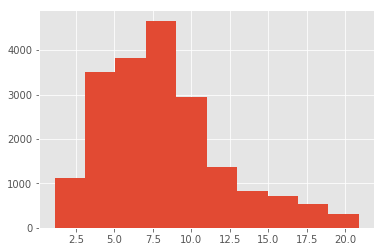

In [57]:
unemployment['unemployment_rate'].hist()

### Problema 13: Gráficos con Pandas

Realiza un histográma para la tasa de paro en España.

Antes de seguir con otros ejemplos, ordenemos los datos por país y fecha. Esta es una buena práctica que es especialmente importante cuando se usa el método `.plot ()` de `pandas`, porque los valores del eje x se basan en los índices.

In [58]:
unemployment.sort_values(['name_en', 'year_month'], inplace=True)
unemployment.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en
0,at,nsa,1993.01,1993,1,171000,4.5,eu,Austria
216,at,sa,1993.01,1993,1,144000,3.8,eu,Austria
432,at,trend,1993.01,1993,1,144000,3.8,eu,Austria
1,at,nsa,1993.02,1993,2,175000,4.6,eu,Austria
217,at,sa,1993.02,1993,2,145000,3.8,eu,Austria


Cuando ordenamos, los valores del índice permanecen sin cambios. Por lo tanto, tenemos que restablecerlos. El parámetro `drop` le dice a` pandas` que construya un `DataFrame` *sin* agregar una columna.

In [59]:
unemployment.reset_index(drop=True, inplace=True)
unemployment.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en
0,at,nsa,1993.01,1993,1,171000,4.5,eu,Austria
1,at,sa,1993.01,1993,1,144000,3.8,eu,Austria
2,at,trend,1993.01,1993,1,144000,3.8,eu,Austria
3,at,nsa,1993.02,1993,2,175000,4.6,eu,Austria
4,at,sa,1993.02,1993,2,145000,3.8,eu,Austria


Echemos un vistazo a como evoluciona en el tiempo la tasa de desempleo de España.

In [60]:
spain = unemployment[(unemployment['name_en'] == 'Spain') &
                     (unemployment['seasonality'] == 'sa')]
spain.tail(10)

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en
17602,es,sa,2010.03,2010,3,4504000,19.6,eu,Spain
17605,es,sa,2010.04,2010,4,4566000,19.8,eu,Spain
17608,es,sa,2010.05,2010,5,4631000,20.1,eu,Spain
17611,es,sa,2010.06,2010,6,4677000,20.2,eu,Spain
17614,es,sa,2010.07,2010,7,4711000,20.3,eu,Spain
17617,es,sa,2010.08,2010,8,4739000,20.5,eu,Spain
17620,es,sa,2010.09,2010,9,4773000,20.6,eu,Spain
17623,es,sa,2010.10,2010,10,4758000,20.6,eu,Spain
17626,es,sa,2010.11,2010,11,4723000,20.4,eu,Spain
17629,es,sa,2010.12,2010,12,4672000,20.2,eu,Spain


Ahora pintamos la evolución de la tasa de desempleo con la función `.plot()`

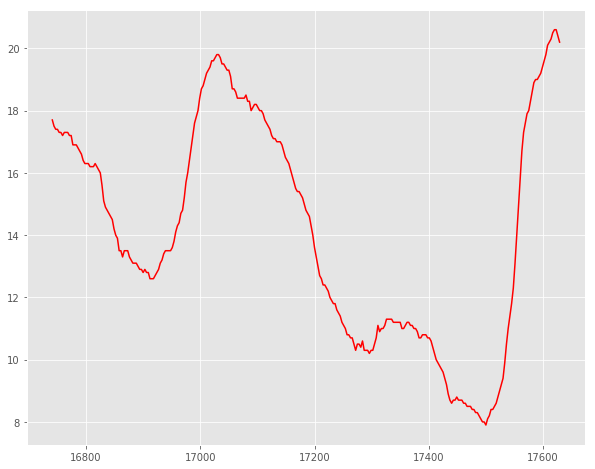

In [61]:
spain['unemployment_rate'].plot(figsize=(10, 8), color='red')

Con el fin de que fijar en el eje X un valor más informativo, vamos a añadir una nueva columna que sea la fecha en la que se publica el data desempleo.

In [62]:
unemployment.insert(loc=0, column='date',
          value=pd.to_datetime(unemployment['year'].astype(str) + '/' + unemployment['month'].astype(str) + '/1'))
unemployment.head()

,date,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en
0,1993-01-01,at,nsa,1993.01,1993,1,171000,4.5,eu,Austria
1,1993-01-01,at,sa,1993.01,1993,1,144000,3.8,eu,Austria
2,1993-01-01,at,trend,1993.01,1993,1,144000,3.8,eu,Austria
3,1993-02-01,at,nsa,1993.02,1993,2,175000,4.6,eu,Austria
4,1993-02-01,at,sa,1993.02,1993,2,145000,3.8,eu,Austria


In [63]:
unemployment.set_index('date',inplace=True)
spain = unemployment[(unemployment['name_en'] == 'Spain') &
                     (unemployment['seasonality'] == 'sa')]
spain.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en
date,,,,,,,,,
1986-04-01,es,sa,1986.04,1986,4,2518000,17.7,eu,Spain
1986-05-01,es,sa,1986.05,1986,5,2502000,17.5,eu,Spain
1986-06-01,es,sa,1986.06,1986,6,2481000,17.4,eu,Spain
1986-07-01,es,sa,1986.07,1986,7,2485000,17.4,eu,Spain
1986-08-01,es,sa,1986.08,1986,8,2476000,17.3,eu,Spain


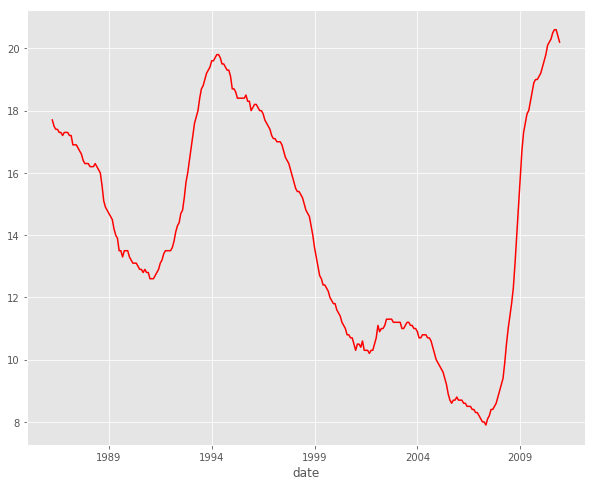

In [64]:
spain['unemployment_rate'].plot(figsize=(10, 8), color='red')

También podría ser interesante **comparar** la tasa de desempleo de España con su vecino al oeste, Portugal.

Primero creamos un `DataFrame` que contenga los datos de desempleo para ambos países.

In [65]:
ps = unemployment[(unemployment['name_en'].isin(['Portugal', 'Spain'])) &
                  (unemployment['seasonality'] == 'sa')]
ps.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en
date,,,,,,,,,
1983-01-01,pt,sa,1983.01,1983,1,345000,7.5,eu,Portugal
1983-02-01,pt,sa,1983.02,1983,2,348000,7.6,eu,Portugal
1983-03-01,pt,sa,1983.03,1983,3,353000,7.7,eu,Portugal
1983-04-01,pt,sa,1983.04,1983,4,359000,7.9,eu,Portugal
1983-05-01,pt,sa,1983.05,1983,5,366000,8.0,eu,Portugal


Un primer intento de pintar esto sería

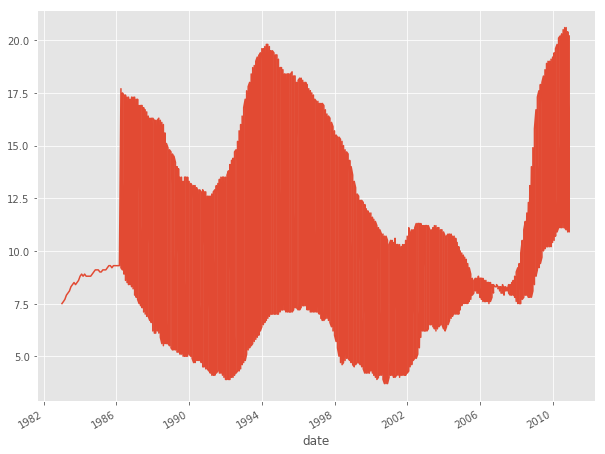

In [66]:
ps['unemployment_rate'].plot(figsize=(10, 8))

Para ello hemos de transformar el `DataFrame` de la siguiente manera

In [67]:
ps2 = ps.pivot(columns='country', values='unemployment_rate')
ps2.tail()

country,es,pt
date,,
2010-08-01,20.5,11.1
2010-09-01,20.6,11.1
2010-10-01,20.6,11.0
2010-11-01,20.4,10.9
2010-12-01,20.2,10.9


Y ahora sí que podemos pintar este `DataFrame`

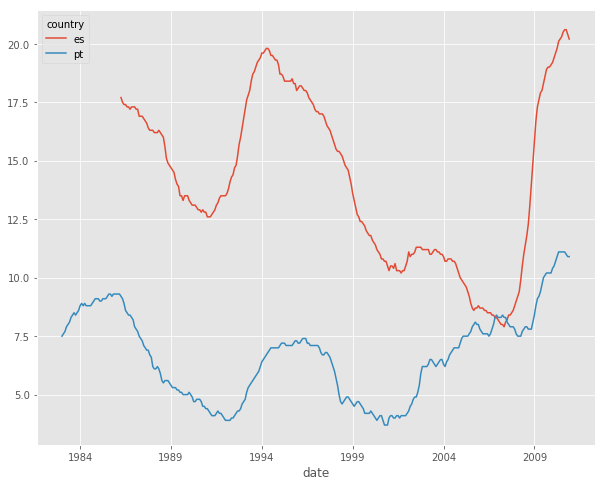

In [68]:
ps2.plot(figsize=(10, 8))

### Problema 14: Gráficos con Pandas

Realiza un mismo gráfico pero comparando la evolución de la tasa de paro en España, Portugal y Alemania

In [69]:
unemployment['name_en'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany (including  former GDR from 1991)', 'Greece', 'Hungary',
       'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Turkey',
       'United Kingdom'], dtype=object)